In [1]:
from bloch import bloch
from bloch.bloch import kronigPenney
from bloch.bloch import blochModel

import torch
import numpy as np
import matplotlib.pyplot as plot

Tesla V100-PCIE-16GB
11.6


In [2]:
# train network

# Set b1 the V zone b2 the zero zone 
b1 = 2*np.pi/8
b2 = 6*np.pi/8

period = abs(b2+b1)
delta = 0

cellsize = np.pi/period

k1 = 0
k2 = cellsize
k1d = k1-delta
k2d = k2+delta



# Set V the well depth
V = 5

neurons = 64 #80 # total hidden layer neurons 
epochs = 45000 # total max allowed epochs
lr = 0.0004 #learning rate
minLoss = -1 #0.00005 # SET TO -1 FOR NO LOSS LIMIT
samplePoints = 200000  ## number of training points per epoch
FOLDER = 'blochmodels/9/'
PATH = FOLDER+'blochbz1'

eqParams = [b1,b2,k1d,k2d,V,period]
netParams = [neurons, samplePoints, epochs, lr, minLoss]

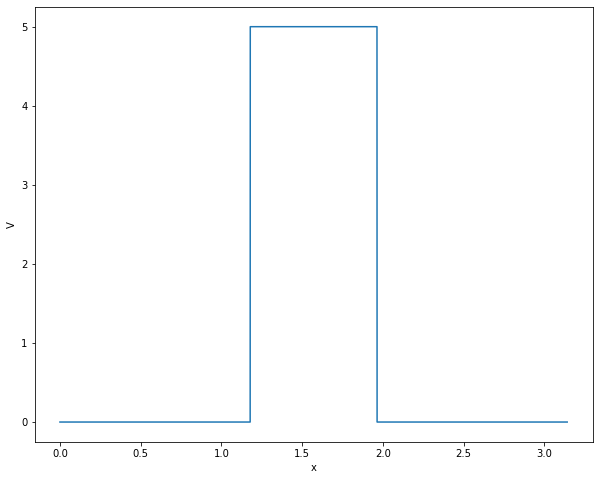

In [3]:
plot.figure(figsize =(10,8))
plotxs = np.linspace(0,period,samplePoints)
#V = kronigPenney(grid, v, width, b2)
plotys = kronigPenney(torch.tensor(plotxs).cuda(),V, period, b1)
plot.plot(plotxs, plotys.cpu())
plot.xlabel('x')
plot.ylabel('V')
plot.show()

In [4]:
model, lastmodel, runTime, total_epochs, lossHistory, tHistory, EHistory = blochModel(eqParams, netParams, PATH, verbose=False)
b1model = model

[0.7853981633974483, 2.356194490192345, 0, 1.0, 5, 3.141592653589793]
Total runtime: 1744.8 seconds


Final loss: 5.62e-05


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/home00/circehsu/.conda/envs/torch-11.6/lib/python3.10/site-packages/torch/_tensor.py:759: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/home00/circehsu/.conda/envs/torch-11.6/lib/python3.10/site-packages/torch/_tensor.py:759: ComplexWarning: Casting complex values to real discards the ima

Text(0, 0.5, 'ψ')

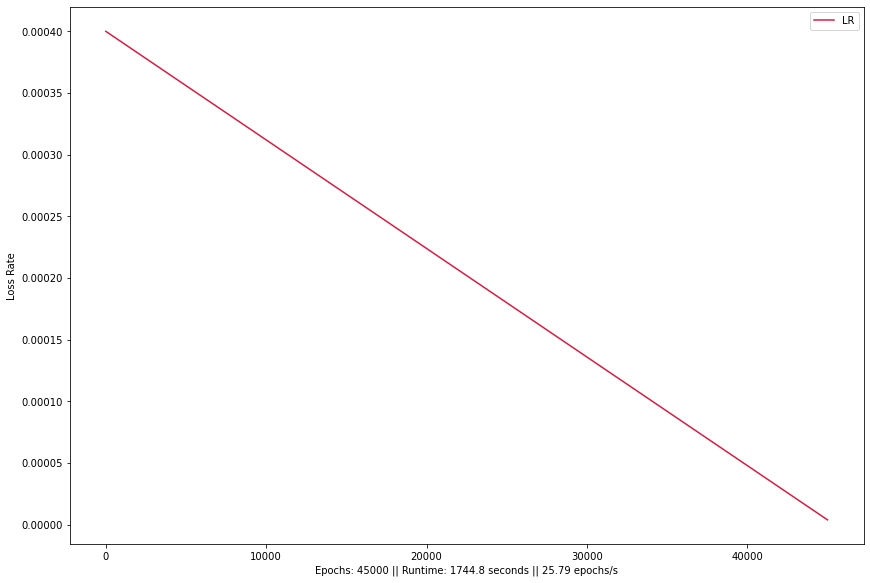

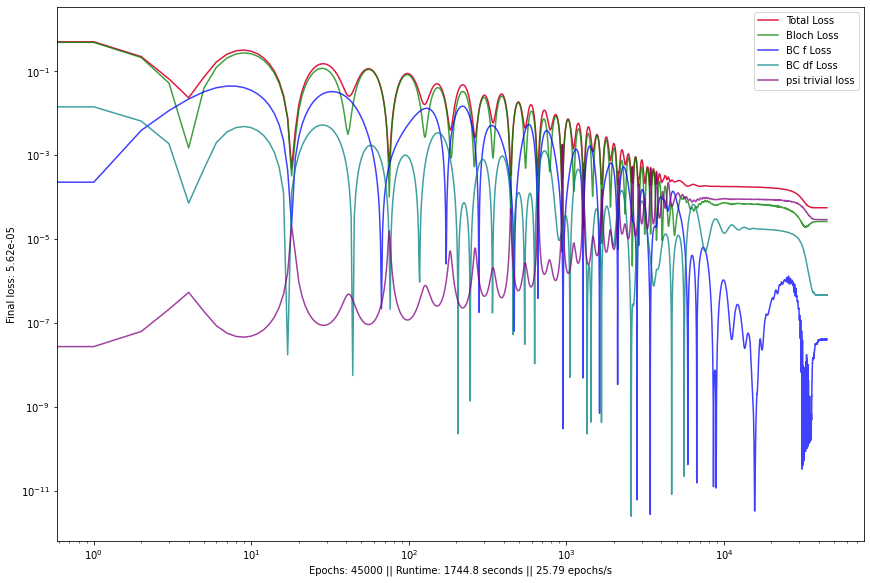

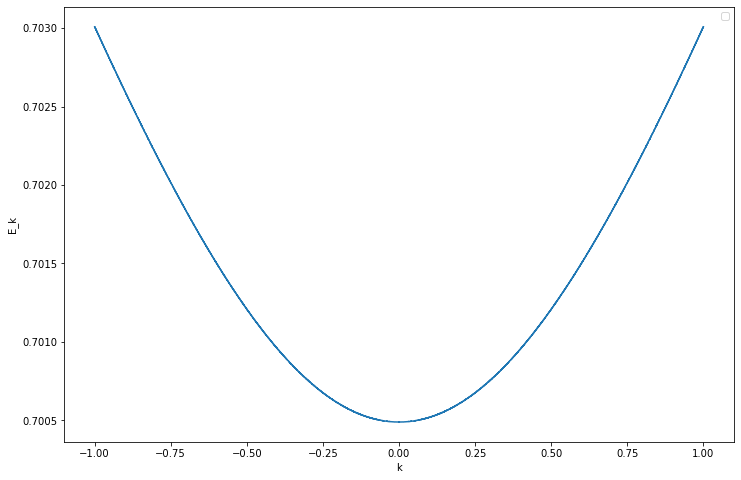

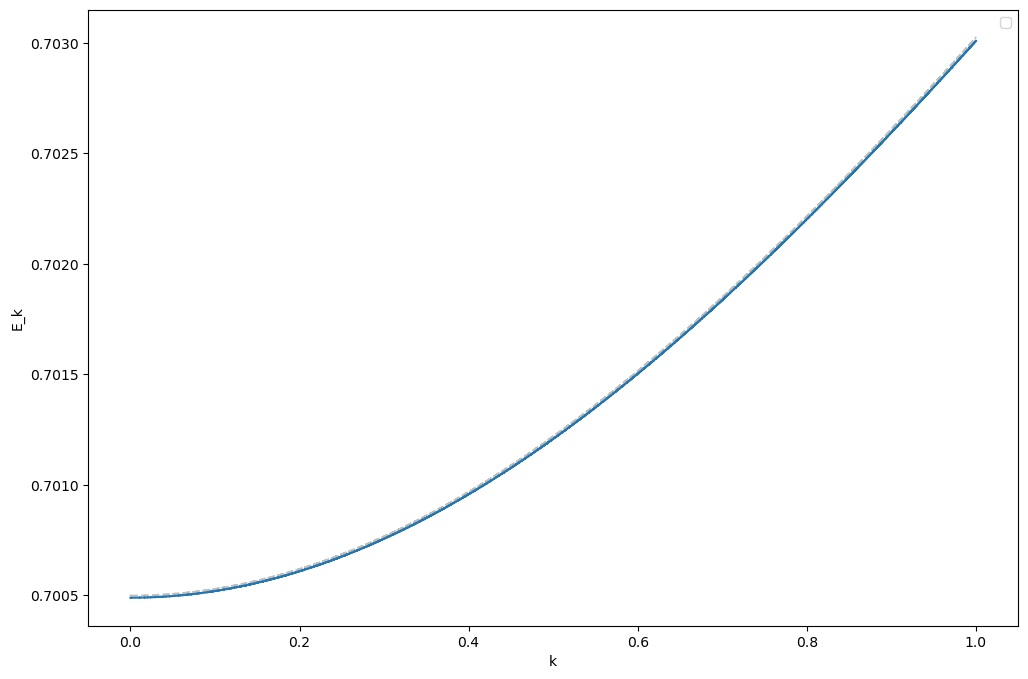

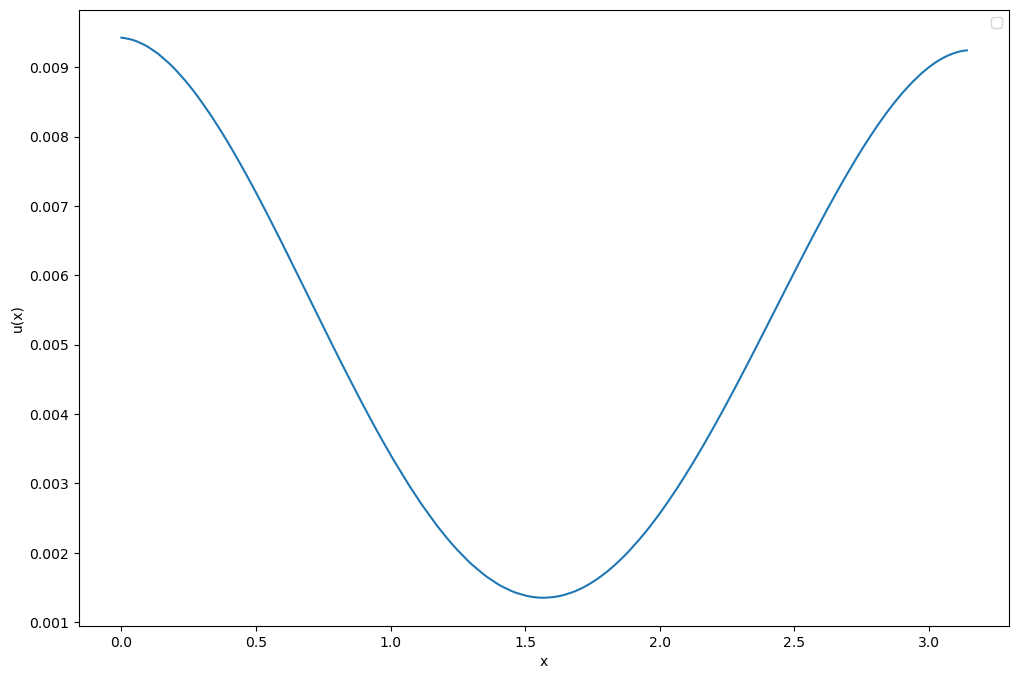

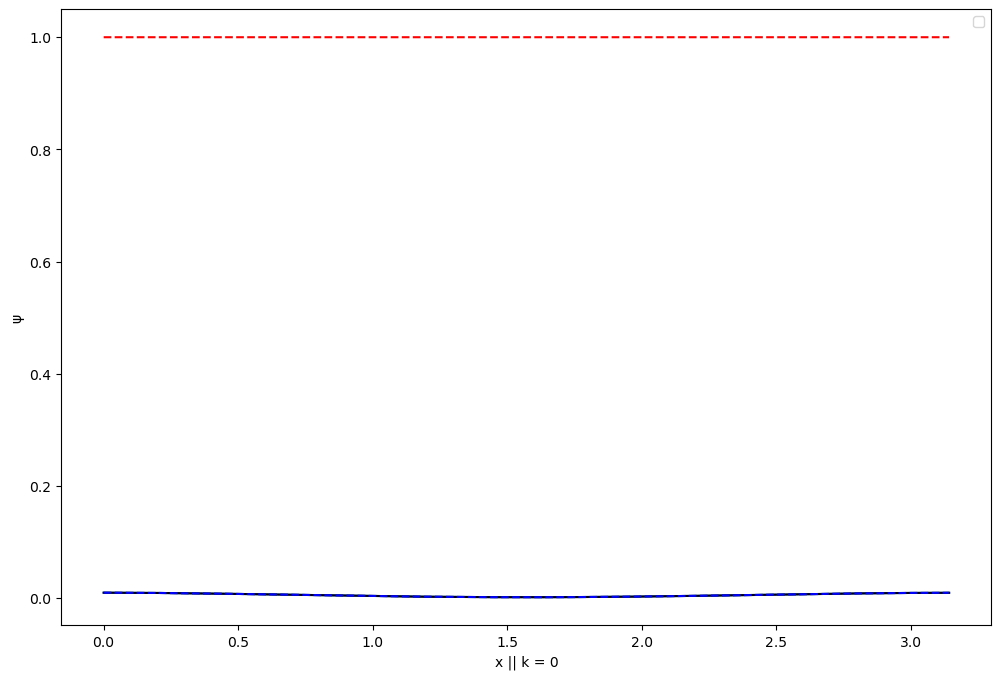

In [5]:
plot.figure(figsize =(12,8))
plot.plot(lossHistory[6],'crimson',alpha=0.975,label='LR'); # total loss

plot.tight_layout()
plot.ylabel('Loss Rate')
plot.xlabel('Epochs: ' + str(total_epochs) + ' || Runtime: ' + str(round(runTime,2)) + ' seconds || ' + str(round(total_epochs/runTime,2)) + ' epochs/s')
#plot.savefig('infinitewell/tanhsin/SE_loss_sinwigglyboy_e3.png')
plot.legend(loc='upper right')
plot.plot()
print('Final loss: ' + str(round(lossHistory[0][-1],7)))

############################################################################################################################

plot.figure(figsize =(12,8))
plot.loglog(lossHistory[0],'crimson',alpha=0.975,label='Total Loss'); # total loss
plot.loglog(lossHistory[1],'-g',alpha=0.75,label='Bloch Loss'); # sde loss
plot.loglog(lossHistory[2],'-b',alpha=0.75,label='BC f Loss'); # trivial loss
plot.loglog(lossHistory[3],'teal',alpha=0.75,label='BC df Loss');# right side loss
plot.loglog(lossHistory[4],'purple',alpha=0.75,label='psi trivial loss');
#plot.loglog(lossHistory[6].cpu(),'teal',alpha=0.75,label='E(k) Negative Loss');


plot.tight_layout()
plot.ylabel('Final loss: ' + str(round(lossHistory[0][-1],7)));plot.xlabel('Epochs: ' + str(total_epochs) + ' || Runtime: ' + str(round(runTime,2)) + ' seconds || ' + str(round(total_epochs/runTime,2)) + ' epochs/s')
#plot.savefig('infinitewell/tanhsin/SE_loss_sinwigglyboy_e3.png')
plot.legend(loc='upper right')
plot.plot()

############################################################################################################################

plot.figure(figsize = (12,8))
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'
#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(k1,k2,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = model(modelxs,modelks)
plot.plot(modelks.cpu(),lj.cpu().detach().numpy(),color='C0')


modelSolution, lj = model(modelxs,-1*modelks)
plot.plot(-1*modelks.cpu(),lj.cpu().detach().numpy(),color='C0')


#plot.xlim([-2,2])
#plot.ylim([-1,5])
plot.legend(loc='upper right')
plot.xlabel('k')
plot.ylabel('E_k')

plot.figure(figsize = (12,8))
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'
#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(k1,k2,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = model(modelxs,modelks)
plot.plot(modelks.cpu(),lj.cpu().detach().numpy())

modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(k1,k2,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = lastmodel(modelxs,modelks)
plot.plot(modelks.cpu(),lj.cpu().detach().numpy(),alpha=0.5,color='grey',linestyle='--')
#plot.xlim([-2,2])
#plot.ylim([-1,5])
plot.legend(loc='upper right')
plot.xlabel('k')
plot.ylabel('E_k')

############################################################################################################################
kval = 0


plot.figure(figsize = (12,8))
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'
#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
#modelxs = b2*((torch.rand(samplePoints)).reshape(-1,1))-b1
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(kval,kval,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = model(modelxs,modelks)
plot.plot(modelxs.cpu(),modelSolution.cpu().detach().numpy())

#plotvx = np.linspace(0,period,samplePoints)
#plotvv = kronigPenney(torch.tensor(plotxs),V, period, b1)
#plot.plot(plotvx, plotvv, color='r', linestyle='--')

#plot.xlim([-1,3])
#plot.ylim([-1,5])
plot.legend(loc='upper right')
plot.xlabel('x')
plot.ylabel('u(x)')

############################################################################################################################

plot.figure(figsize = (12,8))
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'
#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
#modelxs = b2*((torch.rand(samplePoints)).reshape(-1,1))-b1
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(kval,kval,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = model(modelxs,modelks)
paraSolution = np.exp(1j*kval*modelxs.cpu())*modelSolution.cpu().detach().numpy()
plot.plot(modelxs.cpu(),paraSolution)

#plotvx = np.linspace(0,period,samplePoints)
#plotvv = kronigPenney(torch.tensor(plotxs),V, period, b1)
#plot.plot(plotvx, plotvv, color='r', linestyle='--')

#plot.xlim([-1,3])
#plot.ylim([-1,5])
plot.legend(loc='upper right')
plot.xlabel('x')
plot.ylabel('ψ')

############################################################################################################################

plot.plot(modelxs.cpu(),paraSolution,color='black')
plot.plot(modelxs.cpu(),np.exp(1j*kval*modelxs.cpu()),color='red', linestyle='--')
plot.plot(modelxs.cpu(),modelSolution.cpu().detach().numpy() ,color='blue', linestyle='--')


#plot.xlim([-1,3])
    #plot.ylim([-0.004,0.004])
plot.legend(loc='upper right')
plot.xlabel('x || k = ' + str(round(kval,5)))
plot.ylabel('ψ')

In [6]:
torch.cuda.empty_cache()
k1 = cellsize
k2 = (2*cellsize)
k1d = k1-delta
k2d = k2+delta

epochs = 35000 # total max allowed epochs
lr = 0.0008 #learning rate
#minLoss = 0.00011 # SET TO -1 FOR NO LOSS LIMIT

PATH = FOLDER+'blochbz2'

eqParams = [b1,b2,k1d,k2d,V,period]
netParams = [neurons, samplePoints, epochs, lr, minLoss]

In [7]:
model, lastmodel, runTime, total_epochs, lossHistory, tHistory, EHistory = blochModel(eqParams, netParams, PATH)
b2model = model

[0.7853981633974483, 2.356194490192345, 1.0, 2.0, 5, 3.141592653589793]
Total runtime: 1327.71 seconds


Final loss: 6.98e-05


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/home00/circehsu/.conda/envs/torch-11.6/lib/python3.10/site-packages/torch/_tensor.py:759: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/home00/circehsu/.conda/envs/torch-11.6/lib/python3.10/site-packages/torch/_tensor.py:759: ComplexWarning: Casting complex values to real discards the ima

Text(0, 0.5, 'ψ')

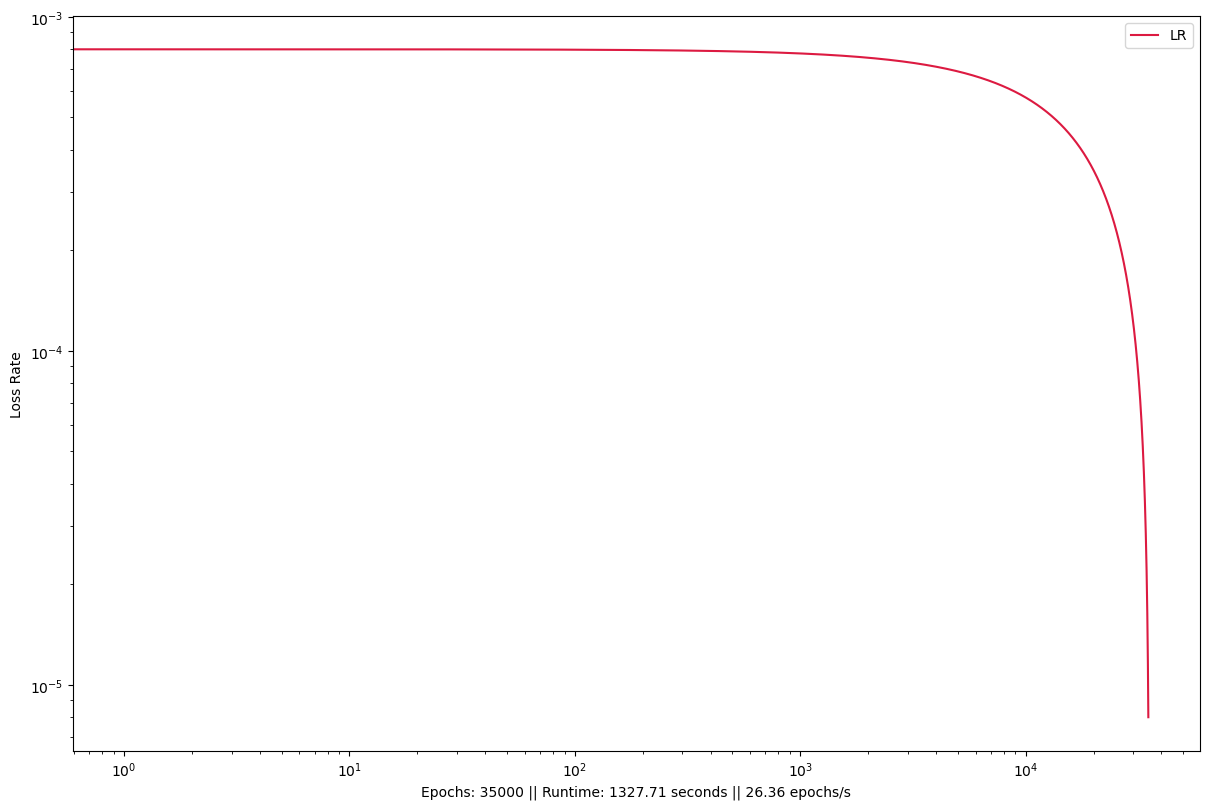

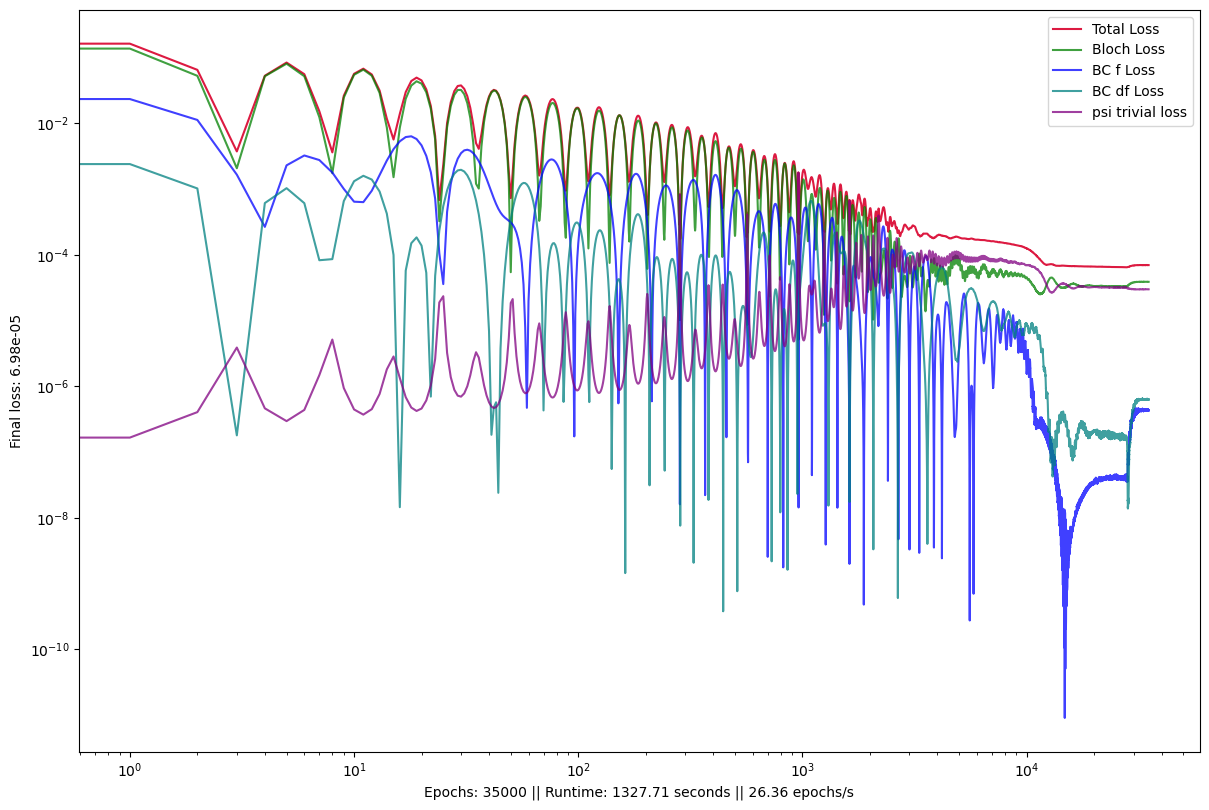

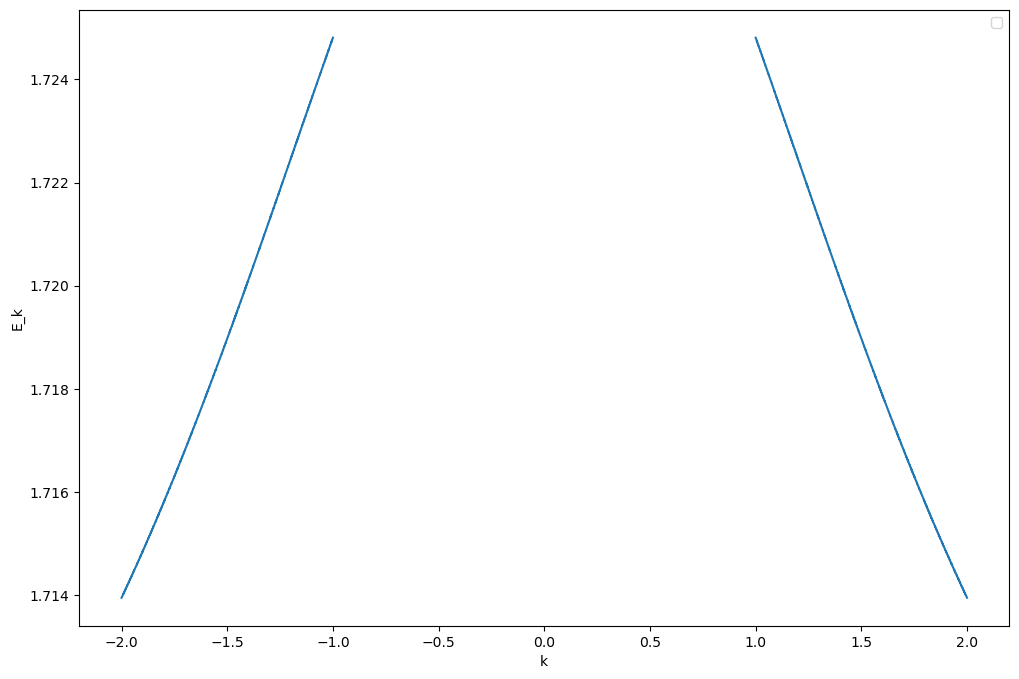

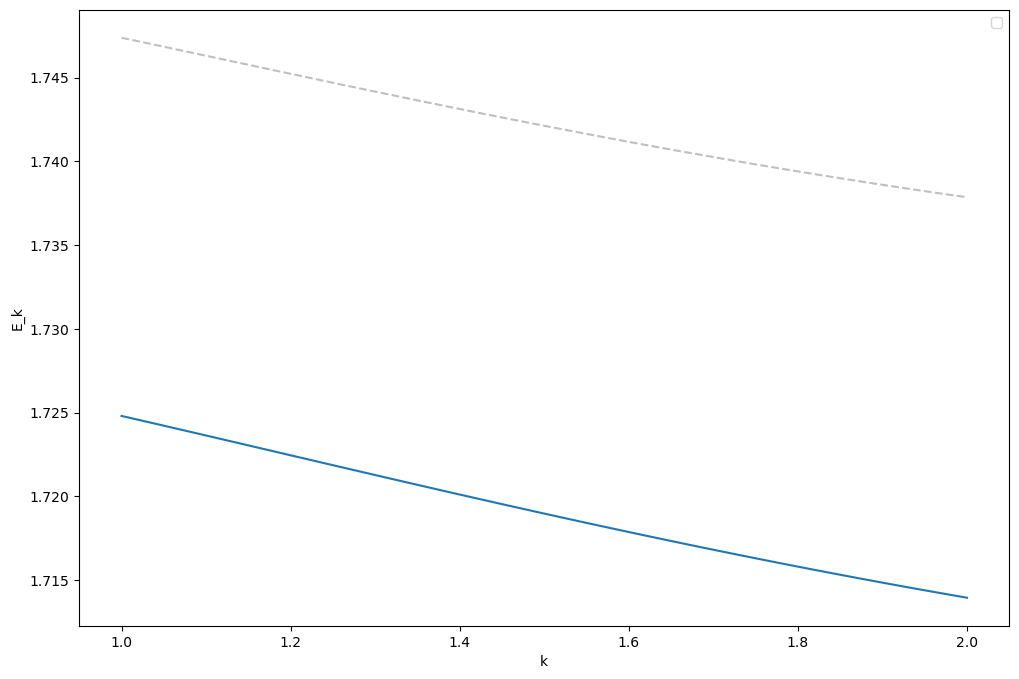

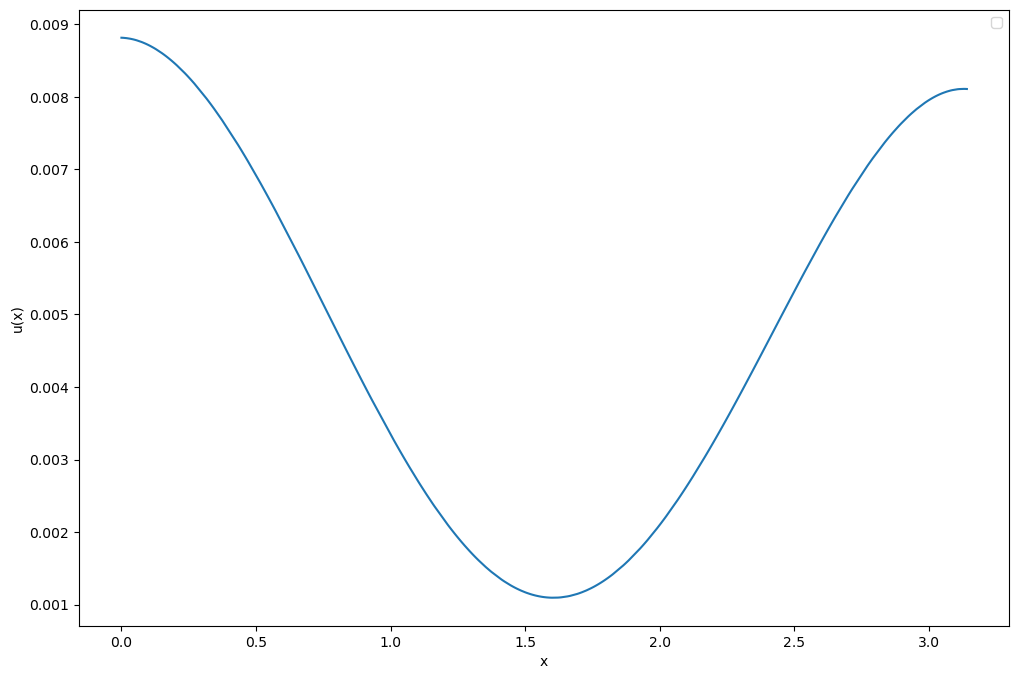

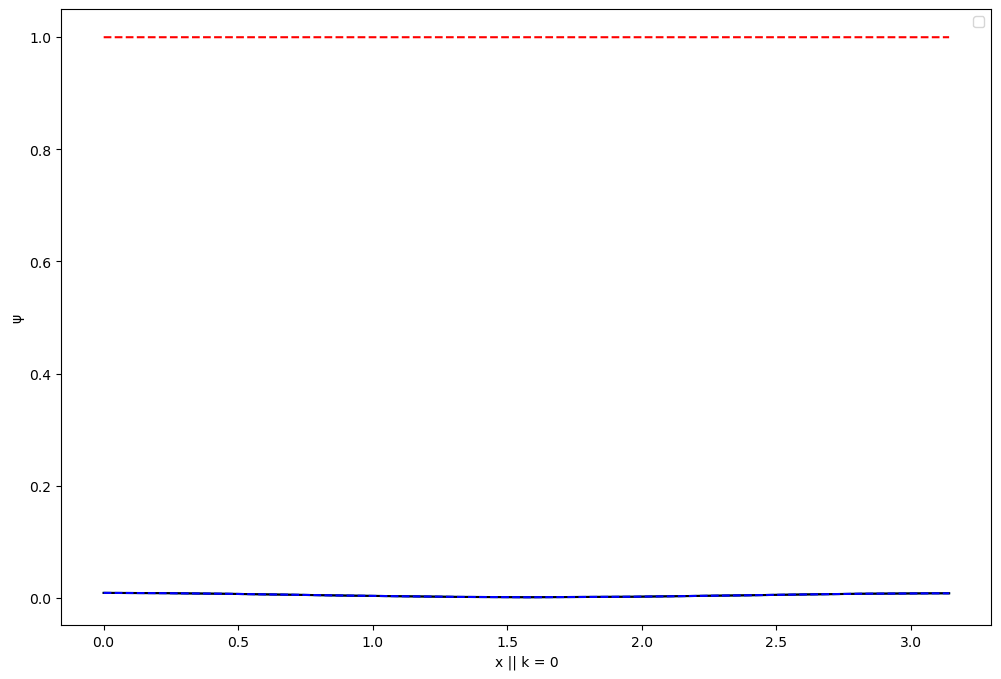

In [8]:
plot.figure(figsize =(12,8))
plot.loglog(lossHistory[6],'crimson',alpha=0.975,label='LR'); # total loss

plot.tight_layout()
plot.ylabel('Loss Rate')
plot.xlabel('Epochs: ' + str(total_epochs) + ' || Runtime: ' + str(round(runTime,2)) + ' seconds || ' + str(round(total_epochs/runTime,2)) + ' epochs/s')
#plot.savefig('infinitewell/tanhsin/SE_loss_sinwigglyboy_e3.png')
plot.legend(loc='upper right')
plot.plot()
print('Final loss: ' + str(round(lossHistory[0][-1],7)))

############################################################################################################################

plot.figure(figsize =(12,8))
plot.loglog(lossHistory[0],'crimson',alpha=0.975,label='Total Loss'); # total loss
plot.loglog(lossHistory[1],'-g',alpha=0.75,label='Bloch Loss'); # sde loss
plot.loglog(lossHistory[2],'-b',alpha=0.75,label='BC f Loss'); # trivial loss
plot.loglog(lossHistory[3],'teal',alpha=0.75,label='BC df Loss');# right side loss
plot.loglog(lossHistory[4],'purple',alpha=0.75,label='psi trivial loss');
#plot.loglog(lossHistory[6].cpu(),'teal',alpha=0.75,label='E(k) Negative Loss');


plot.tight_layout()
plot.ylabel('Final loss: ' + str(round(lossHistory[0][-1],7)));plot.xlabel('Epochs: ' + str(total_epochs) + ' || Runtime: ' + str(round(runTime,2)) + ' seconds || ' + str(round(total_epochs/runTime,2)) + ' epochs/s')
#plot.savefig('infinitewell/tanhsin/SE_loss_sinwigglyboy_e3.png')
plot.legend(loc='upper right')
plot.plot()

############################################################################################################################

plot.figure(figsize = (12,8))
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'
#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(k1,k2,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = model(modelxs,modelks)
plot.plot(modelks.cpu(),lj.cpu().detach().numpy(),color='C0')


modelSolution, lj = model(modelxs,-1*modelks)
plot.plot(-1*modelks.cpu(),lj.cpu().detach().numpy(),color='C0')


#plot.xlim([-2,2])
#plot.ylim([-1,5])
plot.legend(loc='upper right')
plot.xlabel('k')
plot.ylabel('E_k')

plot.figure(figsize = (12,8))
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'
#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(k1,k2,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = model(modelxs,modelks)
plot.plot(modelks.cpu(),lj.cpu().detach().numpy())

modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(k1,k2,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = lastmodel(modelxs,modelks)
plot.plot(modelks.cpu(),lj.cpu().detach().numpy(),alpha=0.5,color='grey',linestyle='--')
#plot.xlim([-2,2])
#plot.ylim([-1,5])
plot.legend(loc='upper right')
plot.xlabel('k')
plot.ylabel('E_k')

############################################################################################################################
kval = 0


plot.figure(figsize = (12,8))
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'
#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
#modelxs = b2*((torch.rand(samplePoints)).reshape(-1,1))-b1
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(kval,kval,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = model(modelxs,modelks)
plot.plot(modelxs.cpu(),modelSolution.cpu().detach().numpy())

#plotvx = np.linspace(0,period,samplePoints)
#plotvv = kronigPenney(torch.tensor(plotxs),V, period, b1)
#plot.plot(plotvx, plotvv, color='r', linestyle='--')

#plot.xlim([-1,3])
#plot.ylim([-1,5])
plot.legend(loc='upper right')
plot.xlabel('x')
plot.ylabel('u(x)')

############################################################################################################################

plot.figure(figsize = (12,8))
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'
#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
#modelxs = b2*((torch.rand(samplePoints)).reshape(-1,1))-b1
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(kval,kval,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = model(modelxs,modelks)
paraSolution = np.exp(1j*kval*modelxs.cpu())*modelSolution.cpu().detach().numpy()
plot.plot(modelxs.cpu(),paraSolution)

#plotvx = np.linspace(0,period,samplePoints)
#plotvv = kronigPenney(torch.tensor(plotxs),V, period, b1)
#plot.plot(plotvx, plotvv, color='r', linestyle='--')

#plot.xlim([-1,3])
#plot.ylim([-1,5])
plot.legend(loc='upper right')
plot.xlabel('x')
plot.ylabel('ψ')

############################################################################################################################

plot.plot(modelxs.cpu(),paraSolution,color='black')
plot.plot(modelxs.cpu(),np.exp(1j*kval*modelxs.cpu()),color='red', linestyle='--')
plot.plot(modelxs.cpu(),modelSolution.cpu().detach().numpy() ,color='blue', linestyle='--')


#plot.xlim([-1,3])
    #plot.ylim([-0.004,0.004])
plot.legend(loc='upper right')
plot.xlabel('x || k = ' + str(round(kval,5)))
plot.ylabel('ψ')

In [9]:
torch.cuda.empty_cache()
k1 = (2*cellsize)
k2 = (3*cellsize)
k1d = k1-delta
k2d = k2+delta

#epochs = 50000 # total max allowed epochs WORKS
#lr = 0.0004 #learning rate WORKS

epochs = 50000 # total max allowed epochs
lr = 0.0004 #learning rate
#minLoss = 0.00008 # SET TO -1 FOR NO LOSS LIMIT

PATH = FOLDER+'blochbz3'

eqParams = [b1,b2,k1d,k2d,V,period]
netParams = [neurons, samplePoints, epochs, lr, minLoss]

In [ ]:
model, lastmodel, runTime, total_epochs, lossHistory, tHistory, EHistory = blochModel(eqParams, netParams, PATH)
b3model = model

[0.7853981633974483, 2.356194490192345, 2.0, 3.0, 5, 3.141592653589793]


In [ ]:
plot.figure(figsize =(12,8))
plot.loglog(lossHistory[6],'crimson',alpha=0.975,label='LR'); # total loss

plot.tight_layout()
plot.ylabel('Loss Rate')
plot.xlabel('Epochs: ' + str(total_epochs) + ' || Runtime: ' + str(round(runTime,2)) + ' seconds || ' + str(round(total_epochs/runTime,2)) + ' epochs/s')
#plot.savefig('infinitewell/tanhsin/SE_loss_sinwigglyboy_e3.png')
plot.legend(loc='upper right')
plot.plot()
print('Final loss: ' + str(round(lossHistory[0][-1],7)))

############################################################################################################################

plot.figure(figsize =(12,8))
plot.loglog(lossHistory[0],'crimson',alpha=0.975,label='Total Loss'); # total loss
plot.loglog(lossHistory[1],'-g',alpha=0.75,label='Bloch Loss'); # sde loss
plot.loglog(lossHistory[2],'-b',alpha=0.75,label='BC f Loss'); # trivial loss
plot.loglog(lossHistory[3],'teal',alpha=0.75,label='BC df Loss');# right side loss
plot.loglog(lossHistory[4],'purple',alpha=0.75,label='psi trivial loss');
#plot.loglog(lossHistory[6].cpu(),'teal',alpha=0.75,label='E(k) Negative Loss');


plot.tight_layout()
plot.ylabel('Final loss: ' + str(round(lossHistory[0][-1],7)));plot.xlabel('Epochs: ' + str(total_epochs) + ' || Runtime: ' + str(round(runTime,2)) + ' seconds || ' + str(round(total_epochs/runTime,2)) + ' epochs/s')
#plot.savefig('infinitewell/tanhsin/SE_loss_sinwigglyboy_e3.png')
plot.legend(loc='upper right')
plot.plot()

############################################################################################################################

plot.figure(figsize = (12,8))
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'
#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(k1,k2,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = model(modelxs,modelks)
plot.plot(modelks.cpu(),lj.cpu().detach().numpy(),color='C0')


modelSolution, lj = model(modelxs,-1*modelks)
plot.plot(-1*modelks.cpu(),lj.cpu().detach().numpy(),color='C0')


#plot.xlim([-2,2])
#plot.ylim([-1,5])
plot.legend(loc='upper right')
plot.xlabel('k')
plot.ylabel('E_k')

plot.figure(figsize = (12,8))
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'
#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(k1,k2,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = model(modelxs,modelks)
plot.plot(modelks.cpu(),lj.cpu().detach().numpy())

modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(k1,k2,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = lastmodel(modelxs,modelks)
plot.plot(modelks.cpu(),lj.cpu().detach().numpy(),alpha=0.5,color='grey',linestyle='--')
#plot.xlim([-2,2])
#plot.ylim([-1,5])
plot.legend(loc='upper right')
plot.xlabel('k')
plot.ylabel('E_k')

############################################################################################################################
kval = 0


plot.figure(figsize = (12,8))
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'
#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
#modelxs = b2*((torch.rand(samplePoints)).reshape(-1,1))-b1
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(kval,kval,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = model(modelxs,modelks)
plot.plot(modelxs.cpu(),modelSolution.cpu().detach().numpy())

#plotvx = np.linspace(0,period,samplePoints)
#plotvv = kronigPenney(torch.tensor(plotxs),V, period, b1)
#plot.plot(plotvx, plotvv, color='r', linestyle='--')

#plot.xlim([-1,3])
#plot.ylim([-1,5])
plot.legend(loc='upper right')
plot.xlabel('x')
plot.ylabel('u(x)')

############################################################################################################################

plot.figure(figsize = (12,8))
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'
#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
#modelxs = b2*((torch.rand(samplePoints)).reshape(-1,1))-b1
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(kval,kval,samplePoints).reshape(-1,1).cuda()
modelSolution, lj = model(modelxs,modelks)
paraSolution = np.exp(1j*kval*modelxs.cpu())*modelSolution.cpu().detach().numpy()
plot.plot(modelxs.cpu(),paraSolution)

#plotvx = np.linspace(0,period,samplePoints)
#plotvv = kronigPenney(torch.tensor(plotxs),V, period, b1)
#plot.plot(plotvx, plotvv, color='r', linestyle='--')

#plot.xlim([-1,3])
#plot.ylim([-1,5])
plot.legend(loc='upper right')
plot.xlabel('x')
plot.ylabel('ψ')

############################################################################################################################

plot.plot(modelxs.cpu(),paraSolution,color='black')
plot.plot(modelxs.cpu(),np.exp(1j*kval*modelxs.cpu()),color='red', linestyle='--')
plot.plot(modelxs.cpu(),modelSolution.cpu().detach().numpy() ,color='blue', linestyle='--')


#plot.xlim([-1,3])
    #plot.ylim([-0.004,0.004])
plot.legend(loc='upper right')
plot.xlabel('x || k = ' + str(round(kval,5)))
plot.ylabel('ψ')

In [ ]:
from numpy import abs,arccos,linspace,array,pi
from cmath import sqrt,sin,cos,cosh,sinh
from scipy import real_if_close
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

hbar = 1 #1.05457*10**-34 
echarge = 1/2#1.602*10**-19
emass = 1#9.109*10**-31 

def bandfunc(a,b,energy,v0):
    #b is the width of the potential barriers and a is the distance between them
    #energy is the value of energy in ElectronVolts that we are solving for
    #v0 is the height of the potential barriers in ElectronVolts
    if(energy==v0):
        return(None)
    result = None
    energy = energy*echarge
    v0 = v0*echarge
    #b = b*10**-10
    #a = a*10**-10
    
    alpha = sqrt((2*emass/hbar**2)*energy)
    beta = sqrt(2*emass*(v0-energy)/hbar**2)
    AlphaBeta_term = (beta**2 - alpha**2) /(2*alpha*beta)
    trace = cos(alpha*a)*cosh(beta*b) + AlphaBeta_term*sin(alpha*a)*sinh(beta*b)
    if abs(trace) < 1:
        result = real_if_close(arccos(trace))
    return(result)

In [ ]:
plot.figure(figsize = (8,8))    
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'

a = (b2+b1) # A IS THE PERIOD
b = b1
v0 = V

energy_array = linspace(0.01,9.9,samplePoints)
#Calulate the positive k values
k_vals = array([bandfunc(a,b,energy,v0) for energy in energy_array])
#The negative k-values are just a mirror image of the positive ones
neg_k_vals = array([-k if k is not None else None for k in k_vals])
#generate the plot
plotkvals = linspace(0,np.pi/period,samplePoints)


# ughhhhhhhhhh
for i in range(len(k_vals)):
    if k_vals[i] is not None:
        k_vals[i] = (k_vals[i])/period
        
for i in range(len(neg_k_vals)):
    if neg_k_vals[i] is not None:
        neg_k_vals[i] = (neg_k_vals[i])/period


plt.plot(k_vals,energy_array,'b',alpha=0.7,linestyle=':',label='Numerically Computed Solution');
plt.plot(neg_k_vals,energy_array,'b',alpha=0.7,linestyle=':');
    

#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(0,np.pi/period,samplePoints).reshape(-1,1).cuda()
plotks = torch.linspace(0,np.pi,samplePoints).reshape(-1,1).cuda()


modelSolution, lj = b1model(modelxs,modelks)
plot.plot((plotks.cpu().detach().numpy()/period),lj.cpu().detach().numpy(),color='C0',label='Model Solution (BZ 1)')

modelSolution, lj = b1model(modelxs,-1*modelks)
plot.plot(-1*(plotks.cpu().detach().numpy()/period),lj.cpu().detach().numpy(),color='C0')

########################################################################

modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(np.pi/period,2*np.pi/period,samplePoints).reshape(-1,1).cuda()

modelSolution, lj = b2model(modelxs,modelks)
plot.plot((plotks.cpu().detach().numpy()/period) - 1, lj.cpu().detach().numpy() ,color='red',label='Model Solution (BZ 2)')

modelSolution, lj = b2model(modelxs,-1*modelks)
plot.plot(-1*(plotks.cpu().detach().numpy()/period) + 1, lj.cpu().detach().numpy() ,color='red')

########################################################################

modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(2*np.pi/period,3*np.pi/period,samplePoints).reshape(-1,1).cuda()

modelSolution, lj = b3model(modelxs,modelks)
plot.plot((plotks.cpu().detach().numpy()/period),lj.cpu().detach().numpy(),color='green',label='Model Solution (BZ 3)')

modelSolution, lj = b3model(modelxs,-1*modelks)
plot.plot(-1*(plotks.cpu().detach().numpy()/period),lj.cpu().detach().numpy(),color='green')

#plot.xlim([-2,2])
plot.legend(loc='upper right')
plot.ylim([0,7])
plot.xlabel('k/a')
plot.ylabel('E(k)')

In [ ]:
plot.figure(figsize = (8,8))    
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'

a = (b2+b1) # A IS THE PERIOD
b = b1
v0 = V

energy_array = linspace(0.01,9.9,samplePoints)
#Calulate the positive k values
k_vals = array([bandfunc(a,b,energy,v0) for energy in energy_array])
#The negative k-values are just a mirror image of the positive ones
neg_k_vals = array([-k if k is not None else None for k in k_vals])


plt.plot(k_vals,energy_array,'b',alpha=0.7,linestyle=':',label='Numerically Computed Solution');
plt.plot(neg_k_vals,energy_array,'b',alpha=0.7,linestyle=':');
    

#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(0,np.pi/period,samplePoints).reshape(-1,1).cuda()
plotks = torch.linspace(0,np.pi,samplePoints).reshape(-1,1).cuda()


modelSolution, lj = b1model(modelxs,modelks)
plot.plot(modelks.cpu().detach().numpy(),lj.cpu().detach().numpy(),color='C0',label='Model Solution (BZ 1 & 3)')

modelSolution, lj = b1model(modelxs,-1*modelks)
plot.plot(modelks.cpu().detach().numpy(),lj.cpu().detach().numpy(),color='C0')

########################################################################

modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(np.pi/period,2*np.pi/period,samplePoints).reshape(-1,1).cuda()

modelSolution, lj = b2model(modelxs,modelks)
plot.plot(modelks.cpu().detach().numpy(), lj.cpu().detach().numpy() ,color='red',label='Model Solution (BZ 2 & 4)')

modelSolution, lj = b2model(modelxs,-1*modelks)
plot.plot(modelks.cpu().detach().numpy(), lj.cpu().detach().numpy() ,color='red')

########################################################################

modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(2*np.pi/period,3*np.pi/period,samplePoints).reshape(-1,1).cuda()

modelSolution, lj = b3model(modelxs,modelks)
plot.plot(modelks.cpu().detach().numpy(),lj.cpu().detach().numpy(),color='C0')

modelSolution, lj = b3model(modelxs,-1*modelks)
plot.plot(modelks.cpu().detach().numpy(),lj.cpu().detach().numpy(),color='C0')

#plot.xlim([-2,2])
plot.legend(loc='upper right')
plot.ylim([0,7])
plot.xlabel('k/a')
plot.ylabel('E(k)')

In [ ]:
plot.figure(figsize = (6,6))    
plot.rcdefaults()
#plot.rcParams['axes.edgecolor'] = 'red'
plot.rcParams['figure.facecolor'] = 'white'

a = (b2+b1) # A IS THE PERIOD
b = b1
v0 = V

energy_array = linspace(0.01,9.9,samplePoints)
#Calulate the positive k values
k_vals = array([bandfunc(a,b,energy,v0) for energy in energy_array])
#The negative k-values are just a mirror image of the positive ones
neg_k_vals = array([-k if k is not None else None for k in k_vals])
#generate the plot
plotkvals = linspace(0,np.pi/period,samplePoints)


# ughhhhhhhhhh
for i in range(len(k_vals)):
    if k_vals[i] is not None:
        k_vals[i] = (k_vals[i])/period
        
for i in range(len(neg_k_vals)):
    if neg_k_vals[i] is not None:
        neg_k_vals[i] = (neg_k_vals[i])/period


plt.plot(k_vals,energy_array,'b',alpha=0.7,linestyle=':',label='Ground Truth');
plt.plot(neg_k_vals,energy_array,'b',alpha=0.7,linestyle=':');
    

#plotys = finiteWell(torch.tensor(plotxs),V,b1,b2)
modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(0,np.pi/period,samplePoints).reshape(-1,1).cuda()
plotks = torch.linspace(0,np.pi,samplePoints).reshape(-1,1).cuda()


modelSolution, lj1 = b1model(modelxs,modelks)

fermi = lj1.mean().cpu().detach().numpy()
plot.plot((plotks.cpu().detach().numpy()/period),lj1.cpu().detach().numpy(),color='C0',label='Model Solution (BZ 1)')

modelSolution, lj1n = b1model(modelxs,-1*modelks)
plot.plot(-1*(plotks.cpu().detach().numpy()/period),lj1n.cpu().detach().numpy(),color='C0')

########################################################################

modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(np.pi/period,2*np.pi/period,samplePoints).reshape(-1,1).cuda()

modelSolution, lj2 = b2model(modelxs,modelks)
plot.plot((plotks.cpu().detach().numpy()/period) - 1, lj2.cpu().detach().numpy()+fermi ,color='red',label='Model Solution (BZ 2)')

modelSolution, lj2n = b2model(modelxs,-1*modelks)
plot.plot(-1*(plotks.cpu().detach().numpy()/period) + 1, lj2n.cpu().detach().numpy()+fermi ,color='red')

bz2mean = lj2.mean().cpu().detach().numpy()
########################################################################

modelxs = torch.linspace(0,period,samplePoints).reshape(-1,1).cuda()
modelks = torch.linspace(2*np.pi/period,3*np.pi/period,samplePoints).reshape(-1,1).cuda()

modelSolution, lj3 = b3model(modelxs,modelks)
plot.plot((plotks.cpu().detach().numpy()/period),lj3.cpu().detach().numpy()+bz2mean,color='green',label='Model Solution (BZ 3)')

modelSolution, lj3n = b3model(modelxs,-1*modelks)
plot.plot(-1*(plotks.cpu().detach().numpy()/period),lj3n.cpu().detach().numpy()+bz2mean,color='green')

#plot.xlim([-2,2])
plot.legend(loc='upper center')
plot.ylim([0,7])
plot.xlabel('k/a')
plot.ylabel('E(k)')